In [2]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [18]:
dt = 0.0001
t = np.arange(0, 5, dt)
M = np.zeros((len(t), 3))
M[0] = np.array([0, 1, 0]) # Initial Magnetization
M0 = np.linalg.norm(M[0])
B = np.array([0, 0, 0.3])
gamma = 42.58
T1 = 2
T2 = 1

In [19]:
K = np.array([[-1/T2, gamma*B[2], -gamma*B[1]], [-gamma*B[2], -1/T2, gamma*B[0]], [gamma*B[1], -gamma*B[0], -1/T1]])
for i in range(len(t) - 1):
    dM = (np.matmul(K, M[i]) + np.array([0, 0, M0/T1])) * dt
    M[i + 1] = M[i] + dM

Text(0, 0.5, 'M')

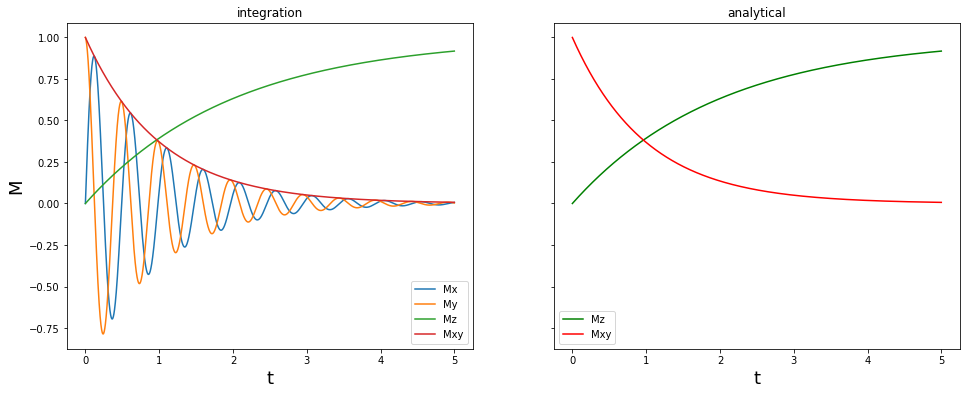

In [20]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(16,6))
ax1.plot(t, M[:, 0], label='Mx')
ax1.plot(t, M[:, 1], label='My')
ax1.plot(t, M[:, 2], label='Mz')
ax1.plot(t, (M[:, 0]**2 + M[:, 1]**2)**0.5, label='Mxy')
ax1.set_title('integration')
ax1.legend()

## Analytical Solution
a = 1 - (M[0, 2]/M0) # Integration constant
Mz = M0*(1 - a*np.exp(-t/T1))
Mxy0 = (M[0, 0]**2 + M[0, 1]**2)**0.5
Mxy = Mxy0 * np.exp(-t/T2)
ax2.plot(t, Mz, label='Mz', color='green')
ax2.plot(t, Mxy, label='Mxy', color='red')
ax2.set_title('analytical')
ax2.legend()

ax1.set_xlabel('t',fontsize=18)
ax2.set_xlabel('t',fontsize=18)
ax1.set_ylabel('M',fontsize=18)